<a href="https://colab.research.google.com/github/taha-shafique/mmai894/blob/Taha/Crack_Detection_0318_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

For this project, the team used 2 datasets:
The primary dataset was 20,000 images of cracks in concrete 20,000 wihtout images of concrete without cracks.
https://data.mendeley.com/datasets/5y9wdsg2zt/2
The secondary dataset was SDNET 2018 crack image dataset. This was used to test how well models perform on surfaces they have not been trained on.
https://digitalcommons.usu.edu/all_datasets/48/
Uploading data from the google drive or google cloud was taking several hours every time. To make data download easier and faster, we uploaded the data to JosephAmbrose.com

**Download ZIP files and unzip into Colab environment**

In [ ]:
# Download training/validation data file (40000 concrete images with and without cracks)
!wget https://www.josephambrose.com/concrete_data.zip
# Download testing data file (56000 images of pavements, decks, and walls with and without cracks)
!wget https://www.josephambrose.com/SDNET.zip

--2021-04-01 21:32:48--  https://www.josephambrose.com/concrete_data.zip
Resolving www.josephambrose.com (www.josephambrose.com)... 64.37.52.52
Connecting to www.josephambrose.com (www.josephambrose.com)|64.37.52.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243982265 (233M) [application/zip]
Saving to: ‘concrete_data.zip’

concrete_data.zip   100%[===================>] 232.68M   477KB/s    in 5m 55s  

2021-04-01 21:38:44 (671 KB/s) - ‘concrete_data.zip’ saved [243982265/243982265]

--2021-04-01 21:38:44--  https://www.josephambrose.com/SDNET.zip
Resolving www.josephambrose.com (www.josephambrose.com)... 64.37.52.52
Connecting to www.josephambrose.com (www.josephambrose.com)|64.37.52.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528256823 (504M) [application/zip]
Saving to: ‘SDNET.zip’

SDNET.zip           100%[===================>] 503.78M   727KB/s    in 13m 26s 

2021-04-01 21:52:10 (640 KB/s) - ‘SDNET.zip’ saved [528256

In [ ]:
import os
# Unzip the files that have been downloaded
!unzip -q concrete_data.zip
!unzip -q SDNET.zip
print(os.listdir())

['.config', 'SDNET', 'SDNET.zip', 'concrete_data.zip', 'concrete_data', 'sample_data']


##Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

negative_images = sorted(os.listdir('concrete_data/negative'))[0:]
print("Negative images (n =",len(negative_images), "):", negative_images[:10])

positive_images = sorted(os.listdir('concrete_data/positive'))[0:]
print("Positive images (n =",len(positive_images), "):", positive_images[:10])

print('Each image has the following shape: ',end='')
np.array(Image.open(f'concrete_data/positive/{positive_images[10]}')).shape

Negative images (n = 20000 ): ['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg']
Positive images (n = 20000 ): ['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg']
Each image has the following shape: 

(227, 227, 3)

**Images with Crack**

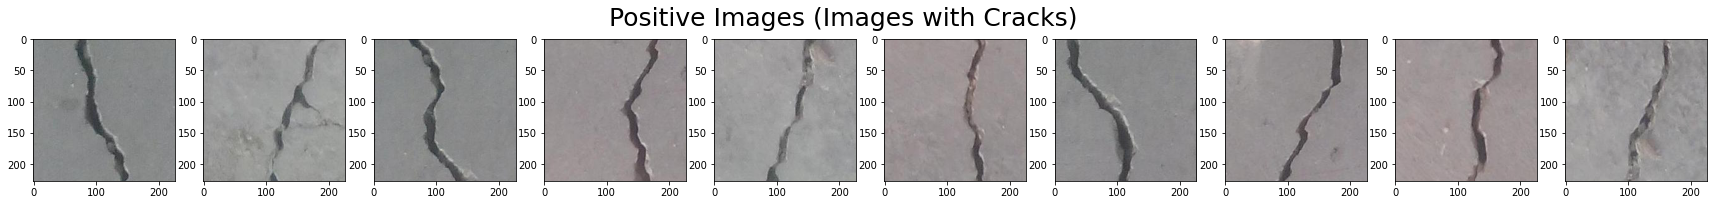

In [ ]:
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    image_data = Image.open(f'concrete_data/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('Positive Images (Images with Cracks)', fontsize=25) 
plt.show()

**Images without Crack**

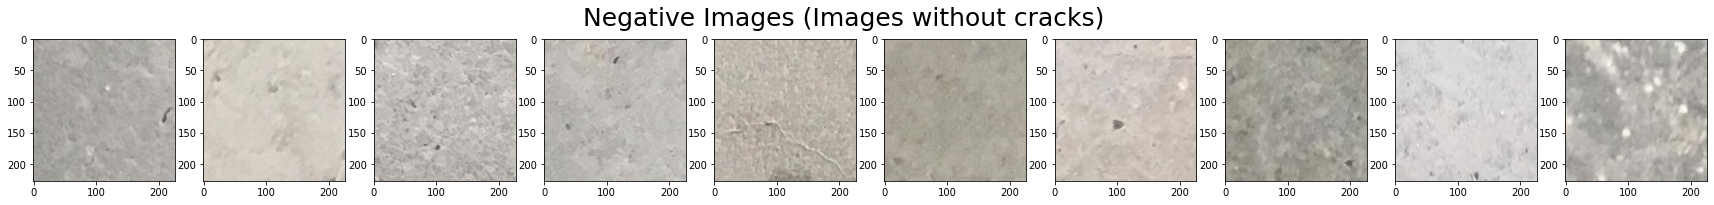

In [ ]:
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    image_data = Image.open(f'concrete_data/negative/{negative_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('Negative Images (Images without cracks)', fontsize=25)
plt.show()


**Creating training and validation folders with image files**




In [ ]:
import shutil
def create_folder(folder_name):
    if os.path.exists(folder_name):
       shutil.rmtree(folder_name)
    os.makedirs(folder_name)

# create training and validation folders
create_folder("training/negative")
create_folder("training/positive")
create_folder("validation/negative")
create_folder("validation/positive")

# obtain root directory
root_directory = os.getcwd()
#print(os.listdir(root_directory))

# defining four folders
training_negative = root_directory + "/training/negative/"
training_positive = root_directory + "/training/positive/"
validation_negative = root_directory + "/validation/negative/"
validation_positive = root_directory + "/validation/positive/"

# randomly allocate 80% of images into training set, and 20% into validation set
# copy images into appropriate folders
import random
random.seed(2021)
for f in positive_images:
    if random.random() > 0.80:
        shutil.copy(f'concrete_data/positive/{f}', validation_positive)
    else:
        shutil.copy(f'concrete_data/positive/{f}', training_positive)

for f in negative_images:
    if random.random() > 0.80:
        shutil.copy(f'concrete_data/negative/{f}', validation_negative)
    else:
        shutil.copy(f'concrete_data/negative/{f}', training_negative)

**Loading training and validation sets with images (from reading files)**

---



In [ ]:
num_classes = 2
image_resize = 227 
training_batch_size = 100
validation_batch_size = 100

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

def create_data_generator_set(folder, batch_size):
    data_generator_set = data_generator.flow_from_directory(folder, target_size=(image_resize, image_resize), batch_size=batch_size, class_mode='categorical')
    return data_generator_set

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)
print("Validation set:")
validation_data = create_data_generator_set(root_directory+'/validation', validation_batch_size)

Training set:
Found 31998 images belonging to 2 classes.
Validation set:
Found 8002 images belonging to 2 classes.


**Creating 3 testing sets (Decks, Pavements, Walls)**

In [ ]:
# The SDNET dataset has cracks in 3 surfaces: Decks, Pavements, and Walls

testing_batch_size = 100
print("Testing sets:")
test_data_Decks = create_data_generator_set(root_directory+'/SDNET/Decks', testing_batch_size)
test_data_Pavements = create_data_generator_set(root_directory+'/SDNET/Pavements', testing_batch_size)
test_data_Walls = create_data_generator_set(root_directory+'/SDNET/Walls', testing_batch_size)
#print(test_data_Decks.target_size)

Testing sets:
Found 13620 images belonging to 2 classes.
Found 24334 images belonging to 2 classes.
Found 18138 images belonging to 2 classes.


## Visualization of SDNET images##

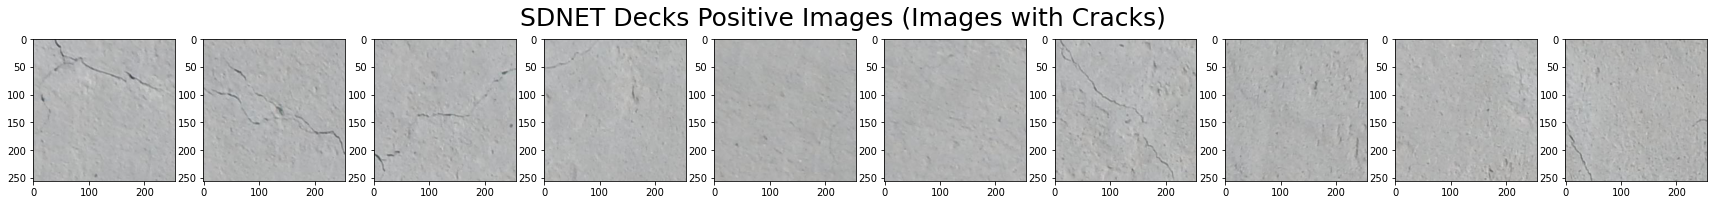

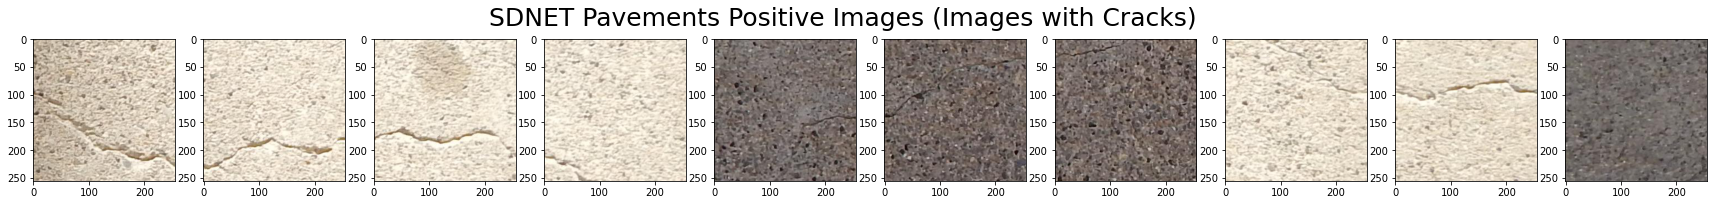

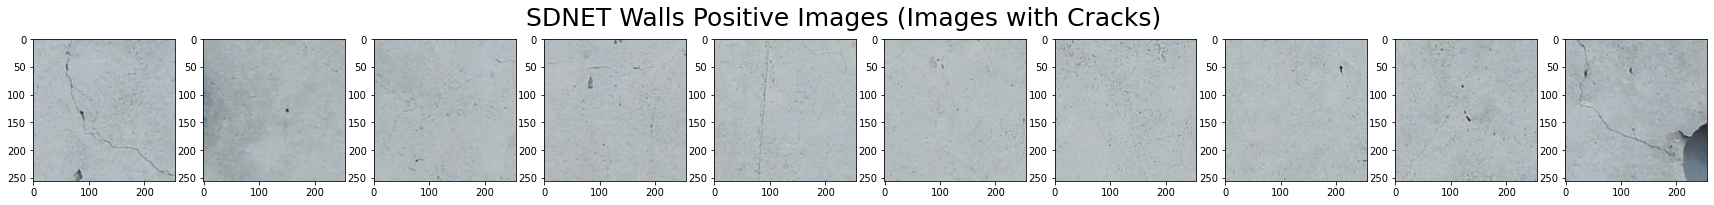

In [ ]:
positive_images = sorted(os.listdir('SDNET/Decks/positive'))[20:]
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    image_data = Image.open(f'SDNET/Decks/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('SDNET Decks Positive Images (Images with Cracks)', fontsize=25) 
plt.show()

positive_images = sorted(os.listdir('SDNET/Pavements/positive'))[4:]
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    image_data = Image.open(f'SDNET/Pavements/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('SDNET Pavements Positive Images (Images with Cracks)', fontsize=25)  
plt.show()

positive_images = sorted(os.listdir('SDNET/Walls/positive'))[12:]
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    image_data = Image.open(f'SDNET/Walls/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('SDNET Walls Positive Images (Images with Cracks)', fontsize=25)  
plt.show()

## CNN model ##

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization

CNN model 1:   
3x3 convolution layer with 32 nodes, 2x2 Max Pooling, 20% Dropout, Flatten layer, Dense layer with 32 nodes and RELU activation, Softmax layer with 2 classes 

In [ ]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_resize,image_resize,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())
cnn1.add(Dense(32, activation='relu'))
cnn1.add(Dense(num_classes, activation='softmax'))
cnn1.summary()

cnn1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

num_epochs = 1
cnn1_fit_history = cnn1.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                12845088  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 12,846,050
Trainable params: 12,846,050
Non-trainable params: 0
____________________________________________

In [ ]:
import keras as keras
import numpy as np
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score

model = keras.models.Sequential()
sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

CNN model 2:   
3x3 convolution layer with 32 nodes, 2x2 Max Pooling, 20% Dropout, Flatten layer, Dense layer with 64 nodes and RELU activation, Softmax layer with 2 classes 

In [ ]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_resize,image_resize,3)))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))
cnn2.add(Flatten())
cnn2.add(Dense(64, activation='relu'))
cnn2.add(Dense(num_classes, activation='softmax'))
cnn2.summary()

cnn2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), callbacks=[metrics])

num_epochs = 3
cnn2_fit_history = cnn2.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                25690176  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 25,691,202
Trainable params: 25,691,202
Non-trainable params: 0
__________________________________________

CNN model 3:   
3x3 convolution layer with 32 nodes, 2x2 Max Pooling, 20% Dropout, Flatten layer, Dense layer with 128 nodes and RELU activation, Softmax layer with 2 classes 

In [ ]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_resize,image_resize,3)))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.2))
cnn3.add(Flatten())
cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dense(num_classes, activation='softmax'))
cnn3.summary()

cnn3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

num_epochs = 3
cnn3_fit_history = cnn3.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51380352  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 51,381,506
Trainable params: 51,381,506
Non-trainable params: 0
__________________________________________

CNN model 4:   
3x3 convolution layer 1 with 32 nodes, 3x3 convolution layer 2 with 32 nodes, 2x2 Max Pooling, 20% Dropout, Flatten layer, Dense layer with 128 nodes and RELU activation, Softmax layer with 2 classes 

In [ ]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_resize,image_resize,3)))
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.2))
cnn4.add(Flatten())
cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dense(num_classes, activation='softmax'))
cnn4.summary()

cnn4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

num_epochs = 3
cnn4_fit_history = cnn4.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 223, 223, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               50466944  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

CNN model 5:   
3x3 convolution layer 1 with 32 nodes, Batch Normalization, 2x2 Max Pooling, 20% Dropout, Flatten layer, Dense layer with 128 nodes and RELU activation, Batch Normalization, Softmax layer with 2 classes 

In [ ]:
from keras.layers import BatchNormalization

cnn5 = Sequential()
cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_resize,image_resize,3)))
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.2))
cnn5.add(Flatten())
cnn5.add(Dense(128, activation='relu'))
cnn5.add(BatchNormalization())   
cnn5.add(Dense(num_classes, activation='softmax'))
cnn5.summary()

cnn5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

num_epochs = 3
cnn5_fit_history = cnn5.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 225, 225, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               51380352  
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)              

## VGG16 pre-trained model ##

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = Sequential()
vgg16.add(VGG16(include_top=False, pooling='max', weights='imagenet'))
vgg16.add(Dense(10,activation='relu'))
vgg16.add(Dense(num_classes, activation='softmax'))
vgg16.layers[0].trainable = False
vgg16.summary()

vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 3
vgg16_fit_history = vgg16.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
Total params: 14,719,840
Trainable params: 5,152
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/3
320/320 [==============================] - 107s 319ms/step - loss: 0.7971 - accuracy: 0.9051 - val_loss: 0.0591 - val_accuracy: 0.9901
Epoch 2/3
320/320 [==============================] - 97s 302ms/step - loss: 0.0434 - accuracy: 0.9921 - val_loss: 0.0296 - val_accuracy: 0.9954
Epoch 3/3
320/

## ResNet50 pre-trained model ##

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Input
resnet = Sequential()
resnet.add(ResNet50(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
resnet.add(Dense(10,activation='relu'))
resnet.add(Dense(num_classes, activation='softmax'))
resnet.layers[0].trainable = False
resnet.summary()

resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
resnet_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20490     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 22        
Total params: 23,608,224
Trainable params: 20,512
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/5
320/320 [==============================] - 99s 300ms/step - loss: 0.4501 - accuracy: 0.9201 - val_loss: 0.0089 - val_accuracy: 0.9970
Epoch 2/5
320/320 [==============================] - 95s 295ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 3/5
320/

## Xception model ##

In [ ]:
from keras.applications.xception import Xception
from keras.layers import Input
xception = Sequential()
xception.add(Xception(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
xception.add(Dense(10,activation='relu'))
xception.add(Dense(num_classes, activation='softmax'))
xception.layers[0].trainable = False
xception.summary()

xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
xception_fit_history = xception.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)


83689472/83683744 [==============================] - 2s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense_14 (Dense)             (None, 10)                20490     
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 22        
Total params: 20,881,992
Trainable params: 20,512
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/5
320/320 [==============================] - 100s 302ms/step - loss: 1.9265 - accuracy: 0.8887 - val_loss: 0.1438 - val_accuracy: 0.9653
Epoch 2/5
320/320 [==============================] - 93s 291ms/step - loss: 0.1233 - accuracy: 0.9694 - val_loss: 0.1018 - val_accuracy: 0.9746
Epoch 3/5
320

## InceptionV3 model ##

In [ ]:
from keras.applications import InceptionV3
from keras.layers import Input
inception = Sequential()
inception.add(InceptionV3(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
inception.add(Dense(10,activation='relu'))
inception.add(Dense(num_classes, activation='softmax'))
inception.layers[0].trainable = False
inception.summary()

inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
inception_fit_history = inception.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_16 (Dense)             (None, 10)                20490     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 22        
Total params: 21,823,296
Trainable params: 20,512
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/5
320/320 [==============================] - 94s 279ms/step - loss: 0.3818 - accuracy: 0.8628 - val_loss: 0.0887 - val_accuracy: 0.9708
Epoch 2/5
320/320 [==============================] - 87s 273ms/step - loss: 0.0794 - accuracy: 0.9653 - val_loss: 0.0785 - val_accuracy: 0.9798
Epoch 3/5
320/

## NASNetLarge model ##

In [ ]:
from keras.applications import NASNetLarge
from keras.layers import Input
nasnet = Sequential()
nasnet.add(NASNetLarge(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
nasnet.add(Dense(10,activation='relu'))
nasnet.add(Dense(num_classes, activation='softmax'))
nasnet.layers[0].trainable = False
nasnet.summary()

nasnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
nasnet_fit_history = nasnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

343613440/343610240 [==============================] - 5s 0us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 4032)              84916818  
_________________________________________________________________
dense_18 (Dense)             (None, 10)                40330     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 22        
Total params: 84,957,170
Trainable params: 40,352
Non-trainable params: 84,916,818
_________________________________________________________________
Epoch 1/5
320/320 [==============================] - 175s 497ms/step - loss: 0.5955 - accuracy: 0.8664 - val_loss: 0.2562 - val_accuracy: 0.9795
Epoch 2/5
320/320 [==============================] - 153s 477ms/step - loss: 0.2333 - accuracy: 0.9797 - val_loss: 0.1830 - val_accuracy: 0.9793
Epoch 3/5


## DenseNet model ##

In [ ]:
from keras.applications import DenseNet201
from keras.layers import Input

densenet = Sequential()
densenet.add(DenseNet201(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
densenet.add(Dense(10,activation='relu'))
densenet.add(Dense(num_classes, activation='softmax'))
densenet.layers[0].trainable = False
densenet.summary()

densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
densenet_fit_history = densenet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)



74842112/74836368 [==============================] - 1s 0us/step
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
dense_20 (Dense)             (None, 10)                19210     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 22        
Total params: 18,341,216
Trainable params: 19,232
Non-trainable params: 18,321,984
_________________________________________________________________
Epoch 1/5
320/320 [==============================] - 115s 324ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0098 - val_accuracy: 0.9973
Epoch 2/5
320/320 [==============================] - 98s 305ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0054 - val_accuracy: 0.9979
Epoch 3/5
32

##YoLo Model

## Testing all models using SDNET data ##

**Create model testing function that produces confusion matrix and performance metrics**

In [ ]:

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import numpy
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

def model_testing(model, dataset, folder):
    true_classes = dataset.classes #[0:200]
    predicted_classes = []
    for index in range(len(true_classes)):
        img = image.load_img(f'{folder}{dataset.filenames[index]}', target_size=(227,227))
        ary = image.img_to_array(img)
        ary = np.expand_dims(ary, axis=0)
        preds = int(numpy.argmax(model.predict(preprocess_input(ary)), axis=1))
        predicted_classes.append(preds)
    labels_for_classes = list(dataset.class_indices.keys())  
    matrix = confusion_matrix(true_classes, predicted_classes)
    report = classification_report(true_classes, predicted_classes, target_names=labels_for_classes, digits=4) 
    return matrix, report

def model_testing_three_datasets(model):
    print(list(test_data_Decks.class_indices.keys()))
    matrix, report = model_testing(model, test_data_Decks, 'SDNET/Decks/')
    print("Decks:\n", matrix, "\n", report)
    matrix, report = model_testing(model, test_data_Pavements, 'SDNET/Pavements/')
    print("Pavements:\n", matrix, "\n", report)
    matrix, report = model_testing(model, test_data_Walls, 'SDNET/Walls/')
    print("Walls:\n", matrix, "\n", report)

**Testing CNN model performance**

In [ ]:
model_testing_three_datasets(cnn1)

['negative', 'positive']
Decks:
 [[10392  1203]
 [ 1548   477]] 
               precision    recall  f1-score   support

    negative     0.8704    0.8962    0.8831     11595
    positive     0.2839    0.2356    0.2575      2025

    accuracy                         0.7980     13620
   macro avg     0.5771    0.5659    0.5703     13620
weighted avg     0.7832    0.7980    0.7901     13620

Pavements:
 [[ 4572 17154]
 [  213  2395]] 
               precision    recall  f1-score   support

    negative     0.9555    0.2104    0.3449     21726
    positive     0.1225    0.9183    0.2162      2608

    accuracy                         0.2863     24334
   macro avg     0.5390    0.5644    0.2805     24334
weighted avg     0.8662    0.2863    0.3311     24334

Walls:
 [[10684  3603]
 [ 2667  1184]] 
               precision    recall  f1-score   support

    negative     0.8002    0.7478    0.7731     14287
    positive     0.2473    0.3075    0.2741      3851

    accuracy                  

In [ ]:
model_testing_three_datasets(cnn2)

['negative', 'positive']
Decks:
 [[11511    84]
 [ 2022     3]] 
               precision    recall  f1-score   support

    negative     0.8506    0.9928    0.9162     11595
    positive     0.0345    0.0015    0.0028      2025

    accuracy                         0.8454     13620
   macro avg     0.4425    0.4971    0.4595     13620
weighted avg     0.7293    0.8454    0.7804     13620

Pavements:
 [[21621   105]
 [ 2585    23]] 
               precision    recall  f1-score   support

    negative     0.8932    0.9952    0.9414     21726
    positive     0.1797    0.0088    0.0168      2608

    accuracy                         0.8895     24334
   macro avg     0.5364    0.5020    0.4791     24334
weighted avg     0.8167    0.8895    0.8423     24334

Walls:
 [[14275    12]
 [ 3849     2]] 
               precision    recall  f1-score   support

    negative     0.7876    0.9992    0.8809     14287
    positive     0.1429    0.0005    0.0010      3851

    accuracy                  

In [ ]:
model_testing_three_datasets(cnn3)

['negative', 'positive']
Decks:
 [[11017   578]
 [ 1679   346]] 
               precision    recall  f1-score   support

    negative     0.8678    0.9502    0.9071     11595
    positive     0.3745    0.1709    0.2347      2025

    accuracy                         0.8343     13620
   macro avg     0.6211    0.5605    0.5709     13620
weighted avg     0.7944    0.8343    0.8071     13620

Pavements:
 [[13020  8706]
 [ 1107  1501]] 
               precision    recall  f1-score   support

    negative     0.9216    0.5993    0.7263     21726
    positive     0.1471    0.5755    0.2343      2608

    accuracy                         0.5967     24334
   macro avg     0.5343    0.5874    0.4803     24334
weighted avg     0.8386    0.5967    0.6736     24334

Walls:
 [[12450  1837]
 [ 3137   714]] 
               precision    recall  f1-score   support

    negative     0.7987    0.8714    0.8335     14287
    positive     0.2799    0.1854    0.2231      3851

    accuracy                  

In [ ]:
model_testing_three_datasets(cnn4)

['negative', 'positive']
Decks:
 [[10882   713]
 [ 1799   226]] 
               precision    recall  f1-score   support

    negative     0.8581    0.9385    0.8965     11595
    positive     0.2407    0.1116    0.1525      2025

    accuracy                         0.8156     13620
   macro avg     0.5494    0.5251    0.5245     13620
weighted avg     0.7663    0.8156    0.7859     13620

Pavements:
 [[17212  4514]
 [ 1454  1154]] 
               precision    recall  f1-score   support

    negative     0.9221    0.7922    0.8522     21726
    positive     0.2036    0.4425    0.2789      2608

    accuracy                         0.7547     24334
   macro avg     0.5629    0.6174    0.5656     24334
weighted avg     0.8451    0.7547    0.7908     24334

Walls:
 [[13406   881]
 [ 3500   351]] 
               precision    recall  f1-score   support

    negative     0.7930    0.9383    0.8596     14287
    positive     0.2849    0.0911    0.1381      3851

    accuracy                  

In [ ]:
model_testing_three_datasets(cnn5)

['negative', 'positive']
Decks:
 [[10863   732]
 [ 1694   331]] 
               precision    recall  f1-score   support

    negative     0.8651    0.9369    0.8996     11595
    positive     0.3114    0.1635    0.2144      2025

    accuracy                         0.8219     13620
   macro avg     0.5882    0.5502    0.5570     13620
weighted avg     0.7828    0.8219    0.7977     13620

Pavements:
 [[ 4842 16884]
 [  377  2231]] 
               precision    recall  f1-score   support

    negative     0.9278    0.2229    0.3594     21726
    positive     0.1167    0.8554    0.2054      2608

    accuracy                         0.2907     24334
   macro avg     0.5222    0.5392    0.2824     24334
weighted avg     0.8408    0.2907    0.3429     24334

Walls:
 [[11735  2552]
 [ 2923   928]] 
               precision    recall  f1-score   support

    negative     0.8006    0.8214    0.8108     14287
    positive     0.2667    0.2410    0.2532      3851

    accuracy                  

**Testing VGG16 model performance**



In [ ]:
model_testing_three_datasets(vgg16)

['negative', 'positive']
Decks:
 [[10641   954]
 [ 1181   844]] 
               precision    recall  f1-score   support

    negative     0.9001    0.9177    0.9088     11595
    positive     0.4694    0.4168    0.4415      2025

    accuracy                         0.8432     13620
   macro avg     0.6848    0.6673    0.6752     13620
weighted avg     0.8361    0.8432    0.8394     13620

Pavements:
 [[17068  4658]
 [  693  1915]] 
               precision    recall  f1-score   support

    negative     0.9610    0.7856    0.8645     21726
    positive     0.2913    0.7343    0.4172      2608

    accuracy                         0.7801     24334
   macro avg     0.6262    0.7599    0.6408     24334
weighted avg     0.8892    0.7801    0.8165     24334

Walls:
 [[13564   723]
 [ 2713  1138]] 
               precision    recall  f1-score   support

    negative     0.8333    0.9494    0.8876     14287
    positive     0.6115    0.2955    0.3985      3851

    accuracy                  

**Testing ResNet50 model performance**

In [ ]:
model_testing_three_datasets(resnet)

['negative', 'positive']
Decks:
 [[11179   416]
 [ 1586   439]] 
               precision    recall  f1-score   support

    negative     0.8758    0.9641    0.9178     11595
    positive     0.5135    0.2168    0.3049      2025

    accuracy                         0.8530     13620
   macro avg     0.6946    0.5905    0.6113     13620
weighted avg     0.8219    0.8530    0.8267     13620

Pavements:
 [[20223  1503]
 [ 1246  1362]] 
               precision    recall  f1-score   support

    negative     0.9420    0.9308    0.9364     21726
    positive     0.4754    0.5222    0.4977      2608

    accuracy                         0.8870     24334
   macro avg     0.7087    0.7265    0.7170     24334
weighted avg     0.8920    0.8870    0.8893     24334

Walls:
 [[14167   120]
 [ 3319   532]] 
               precision    recall  f1-score   support

    negative     0.8102    0.9916    0.8918     14287
    positive     0.8160    0.1381    0.2363      3851

    accuracy                  

**Testing Xception model performance**

In [ ]:
model_testing_three_datasets(xception)

['negative', 'positive']
Decks:
 [[10764   831]
 [ 1771   254]] 
               precision    recall  f1-score   support

    negative     0.8587    0.9283    0.8922     11595
    positive     0.2341    0.1254    0.1633      2025

    accuracy                         0.8090     13620
   macro avg     0.5464    0.5269    0.5278     13620
weighted avg     0.7658    0.8090    0.7838     13620

Pavements:
 [[15473  6253]
 [ 1397  1211]] 
               precision    recall  f1-score   support

    negative     0.9172    0.7122    0.8018     21726
    positive     0.1622    0.4643    0.2405      2608

    accuracy                         0.6856     24334
   macro avg     0.5397    0.5883    0.5211     24334
weighted avg     0.8363    0.6856    0.7416     24334

Walls:
 [[12150  2137]
 [ 3108   743]] 
               precision    recall  f1-score   support

    negative     0.7963    0.8504    0.8225     14287
    positive     0.2580    0.1929    0.2208      3851

    accuracy                  

**Testing InceptionV3 model performance**

In [ ]:
model_testing_three_datasets(inception)

['negative', 'positive']
Decks:
 [[10619   976]
 [ 1588   437]] 
               precision    recall  f1-score   support

    negative     0.8699    0.9158    0.8923     11595
    positive     0.3093    0.2158    0.2542      2025

    accuracy                         0.8117     13620
   macro avg     0.5896    0.5658    0.5732     13620
weighted avg     0.7866    0.8117    0.7974     13620

Pavements:
 [[15758  5968]
 [ 1252  1356]] 
               precision    recall  f1-score   support

    negative     0.9264    0.7253    0.8136     21726
    positive     0.1851    0.5199    0.2731      2608

    accuracy                         0.7033     24334
   macro avg     0.5558    0.6226    0.5433     24334
weighted avg     0.8470    0.7033    0.7557     24334

Walls:
 [[10583  3704]
 [ 2556  1295]] 
               precision    recall  f1-score   support

    negative     0.8055    0.7407    0.7717     14287
    positive     0.2591    0.3363    0.2927      3851

    accuracy                  

**Testing NASNetLarge model performance**

In [ ]:
model_testing_three_datasets(nasnet)

['negative', 'positive']
Decks:
 [[10951   644]
 [ 1853   172]] 
               precision    recall  f1-score   support

    negative     0.8553    0.9445    0.8977     11595
    positive     0.2108    0.0849    0.1211      2025

    accuracy                         0.8167     13620
   macro avg     0.5330    0.5147    0.5094     13620
weighted avg     0.7595    0.8167    0.7822     13620

Pavements:
 [[16728  4998]
 [ 1149  1459]] 
               precision    recall  f1-score   support

    negative     0.9357    0.7700    0.8448     21726
    positive     0.2260    0.5594    0.3219      2608

    accuracy                         0.7474     24334
   macro avg     0.5808    0.6647    0.5833     24334
weighted avg     0.8597    0.7474    0.7887     24334

Walls:
 [[13149  1138]
 [ 3332   519]] 
               precision    recall  f1-score   support

    negative     0.7978    0.9203    0.8547     14287
    positive     0.3132    0.1348    0.1885      3851

    accuracy                  

**Testing DenseNet model performance**

In [ ]:
model_testing_three_datasets(densenet)

['negative', 'positive']
Decks:
 [[11049   546]
 [ 1632   393]] 
               precision    recall  f1-score   support

    negative     0.8713    0.9529    0.9103     11595
    positive     0.4185    0.1941    0.2652      2025

    accuracy                         0.8401     13620
   macro avg     0.6449    0.5735    0.5877     13620
weighted avg     0.8040    0.8401    0.8144     13620

Pavements:
 [[19447  2279]
 [ 1363  1245]] 
               precision    recall  f1-score   support

    negative     0.9345    0.8951    0.9144     21726
    positive     0.3533    0.4774    0.4061      2608

    accuracy                         0.8503     24334
   macro avg     0.6439    0.6862    0.6602     24334
weighted avg     0.8722    0.8503    0.8599     24334

Walls:
 [[14064   223]
 [ 3323   528]] 
               precision    recall  f1-score   support

    negative     0.8089    0.9844    0.8880     14287
    positive     0.7031    0.1371    0.2295      3851

    accuracy                  

## Visualizing models ##

In [ ]:
!pip3 install ann_visualizer
!pip install graphviz
!pip install Wand
!apt-get install libmagickwand-dev
from ann_visualizer.visualize import ann_viz
import wand
from wand.image import Image as WImage

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=709fdd5829efc9732748fb5611cec88804748fe0223b49e344fc7b378a275b21
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer
     |████████████████████████████████| 143kB 13.9MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagickcore-6-arch-config libmagickcore-6-headers
  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickco

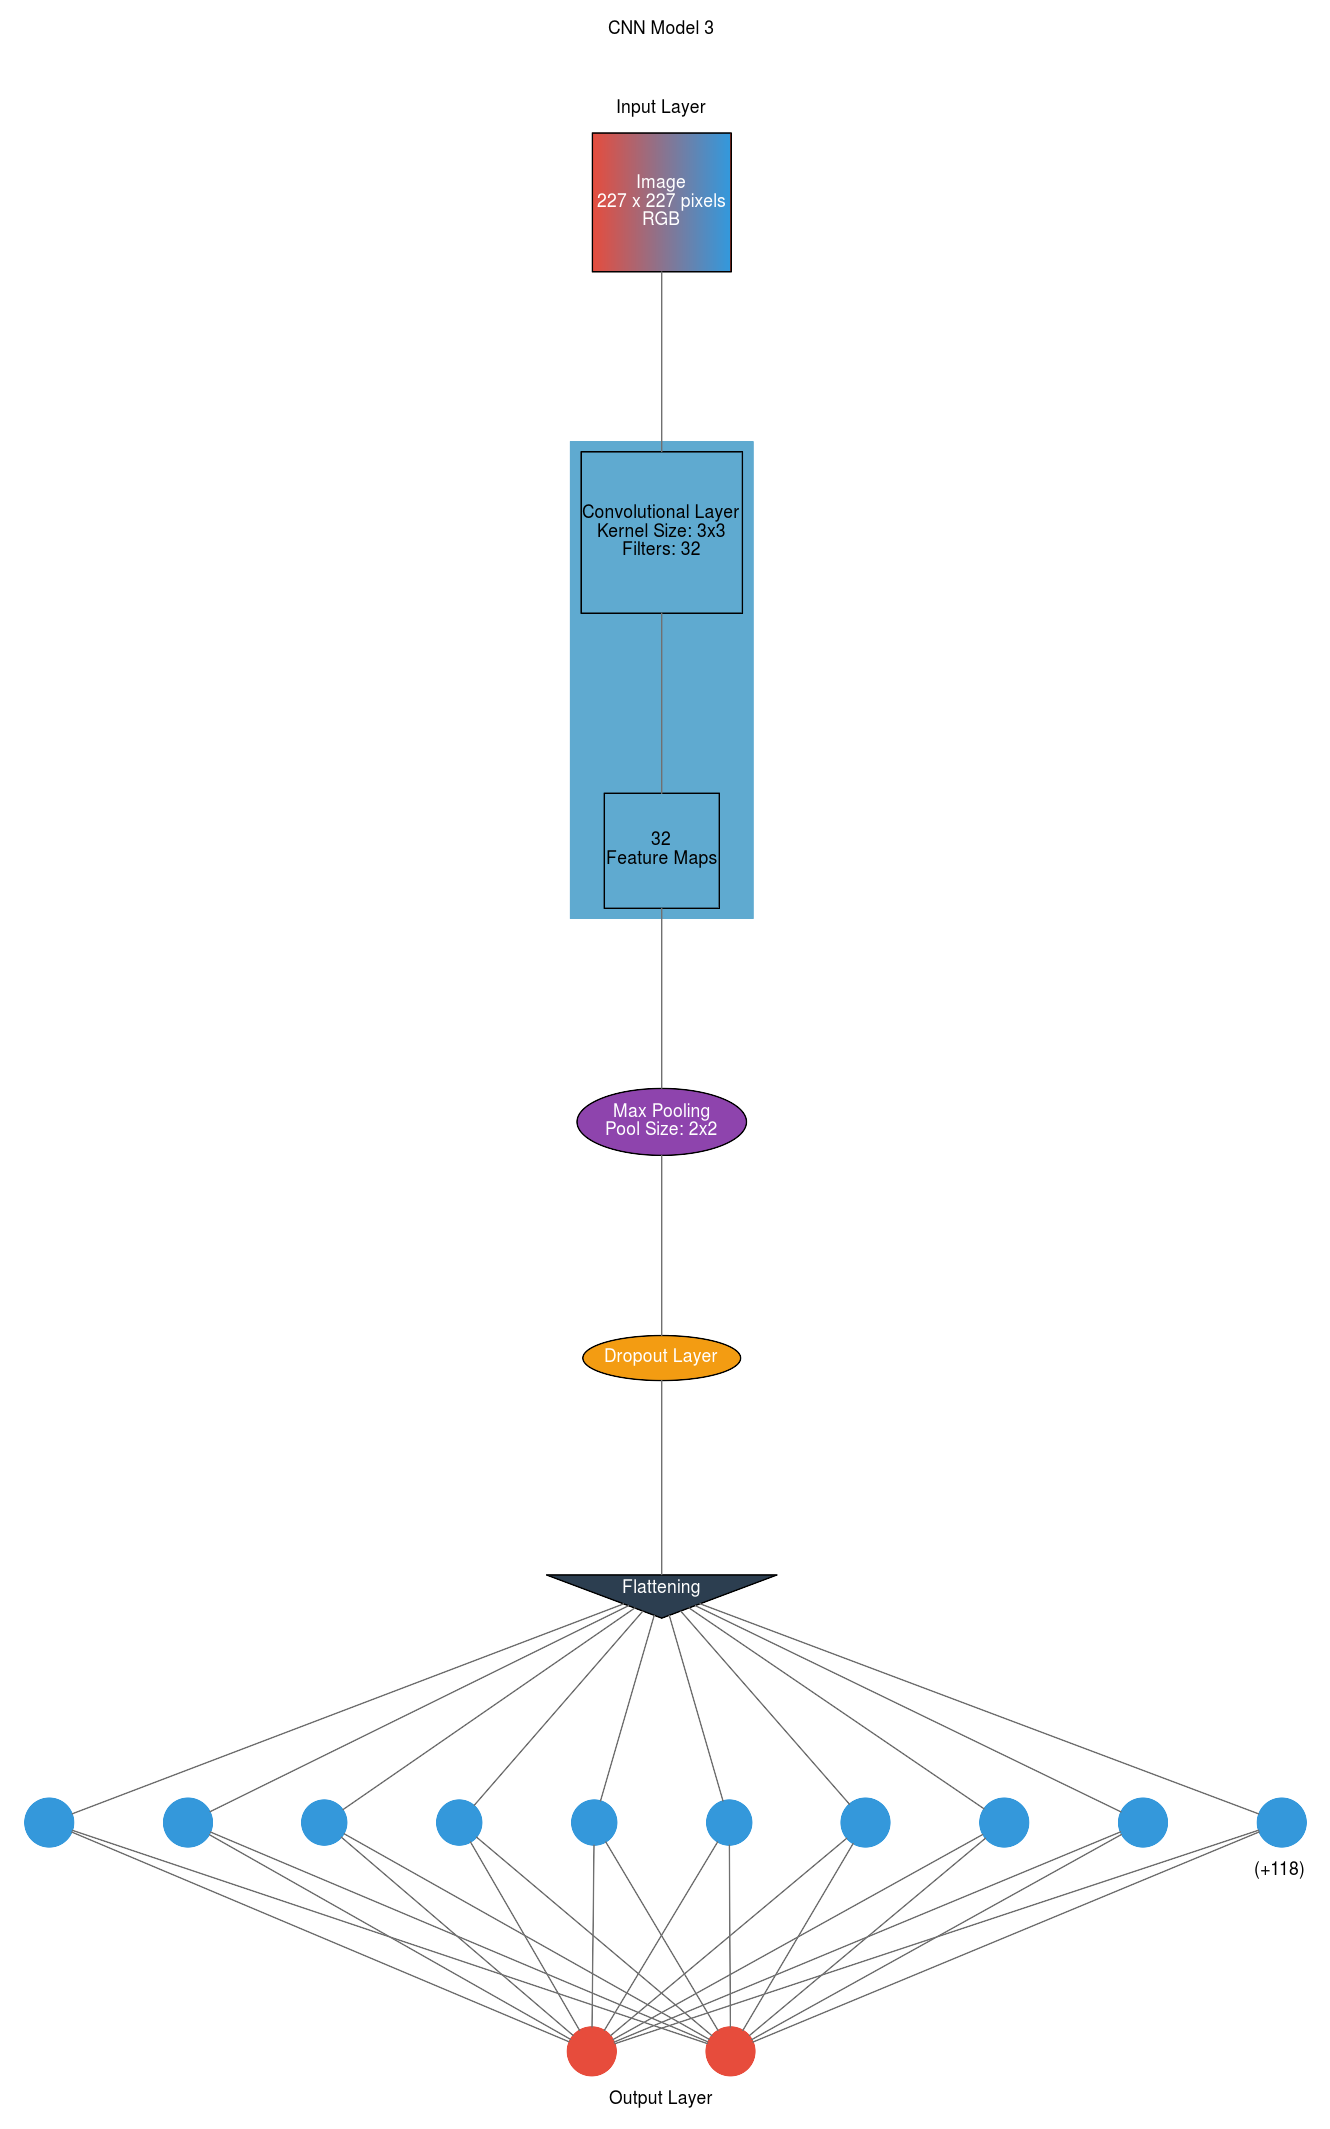

In [ ]:
ann_viz(cnn3, title="CNN Model 3", view=True, filename="network.pdf")
img = WImage(filename='network.pdf', resolution=100)  
img

# Data Augmentation

In [ ]:
import PIL, cv2, scipy
def augment_image(image_data, augmentation_type):
    if augmentation_type == 1: # rotation 90 degree
       image_data = image_data.rotate(90)
    if augmentation_type == 2: # horizonal flip
       image_data = image_data.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    if augmentation_type == 3: # vertical flip
       image_data = image_data.transpose(PIL.Image.FLIP_TOP_BOTTOM)
    return image_data

def add_augmented_images(augmentation_type):
    negative_images = sorted(os.listdir('training/negative'))[0:]
    positive_images = sorted(os.listdir('training/positive'))[0:]
    for f in negative_images:
        if f[0:1] != "A":
           image_data = Image.open(f'training/negative/{f}')
           # augmentation
           image_data = augment_image(image_data, augmentation_type)
           image_data.save(f'training/negative/A{f}')
    for f in positive_images:
        if f[0:1] != "A":
           image_data = Image.open(f'training/positive/{f}')
           # augmentation
           image_data = augment_image(image_data, augmentation_type)
           image_data.save(f'training/positive/A{f}')


## 90 degree augmentation ##

**Adding 90 degree augmented images into training set**

In [ ]:
add_augmented_images(1) # rotation 90 degree

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)

Training set:
Found 63996 images belonging to 2 classes.


**Visualizing the augmented images**

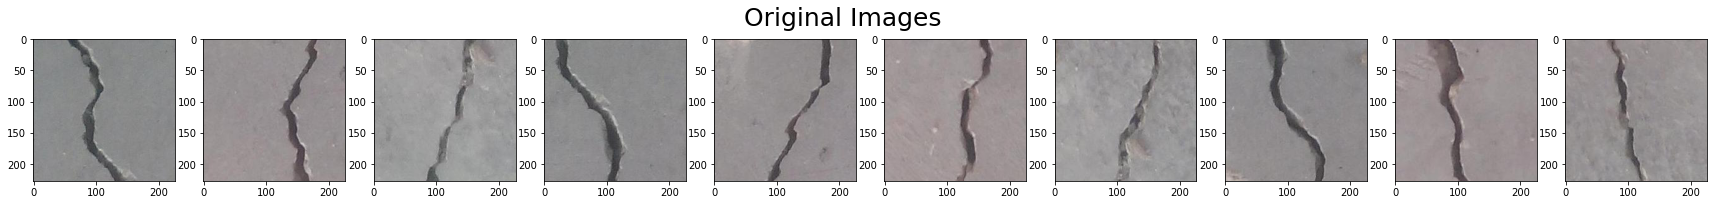

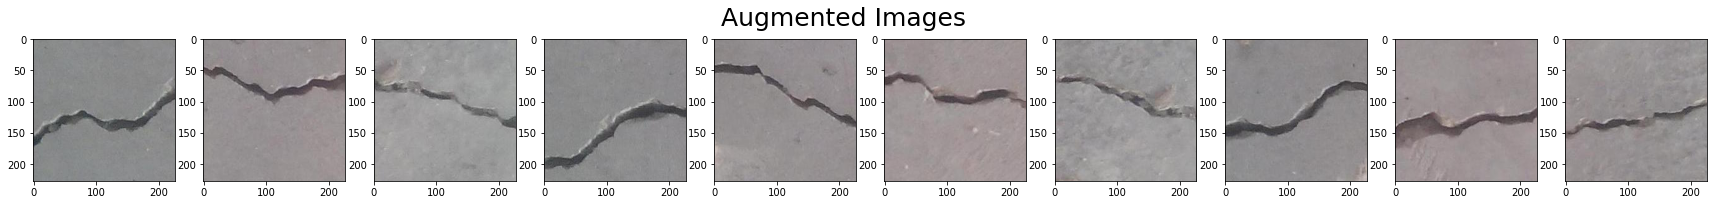

In [ ]:
training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images', fontsize=25)  
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images', fontsize=25)
plt.show()

**Re-run CNN 3 model using augmented images (90 degree rotation) and test its performance**

In [ ]:
cnn3_augmented_fit_history = cnn3.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(cnn3)


Epoch 1/5
640/640 [==============================] - 153s 239ms/step - loss: 1.0299 - accuracy: 0.9900 - val_loss: 0.4417 - val_accuracy: 0.9926
Epoch 2/5
640/640 [==============================] - 152s 237ms/step - loss: 0.2672 - accuracy: 0.9939 - val_loss: 0.3474 - val_accuracy: 0.9930
Epoch 3/5
640/640 [==============================] - 152s 238ms/step - loss: 0.1976 - accuracy: 0.9949 - val_loss: 0.3543 - val_accuracy: 0.9918
Epoch 4/5
640/640 [==============================] - 151s 237ms/step - loss: 0.5691 - accuracy: 0.9930 - val_loss: 45.6710 - val_accuracy: 0.9013
Epoch 5/5
640/640 [==============================] - 152s 237ms/step - loss: 0.8650 - accuracy: 0.9872 - val_loss: 0.6183 - val_accuracy: 0.9840
['negative', 'positive']
Decks:
 [[10980   615]
 [ 1682   343]] 
               precision    recall  f1-score   support

    negative     0.8672    0.9470    0.9053     11595
    positive     0.3580    0.1694    0.2300      2025

    accuracy                         0.8314 

**Re-run ResNet50 model using augmented images (90 degree rotation) and test its performance**

In [ ]:
resnet_augmented_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(resnet)

Epoch 1/5
640/640 [==============================] - 171s 267ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 2/5
640/640 [==============================] - 170s 266ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0050 - val_accuracy: 0.9986
Epoch 3/5
640/640 [==============================] - 170s 266ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 4/5
640/640 [==============================] - 168s 262ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9989
Epoch 5/5
640/640 [==============================] - 166s 260ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0053 - val_accuracy: 0.9989
['negative', 'positive']
Decks:
 [[11033   562]
 [ 1411   614]] 
               precision    recall  f1-score   support

    negative     0.8866    0.9515    0.9179     11595
    positive     0.5221    0.3032    0.3836      2025

    accuracy                         0.8551  

## Horizontal flip augmentation ##

**Adding horizontal flip augmented images to the training set**

In [ ]:
add_augmented_images(2) # horizonal flip

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)

Training set:
Found 63996 images belonging to 2 classes.


**Visualizing the augmented images**

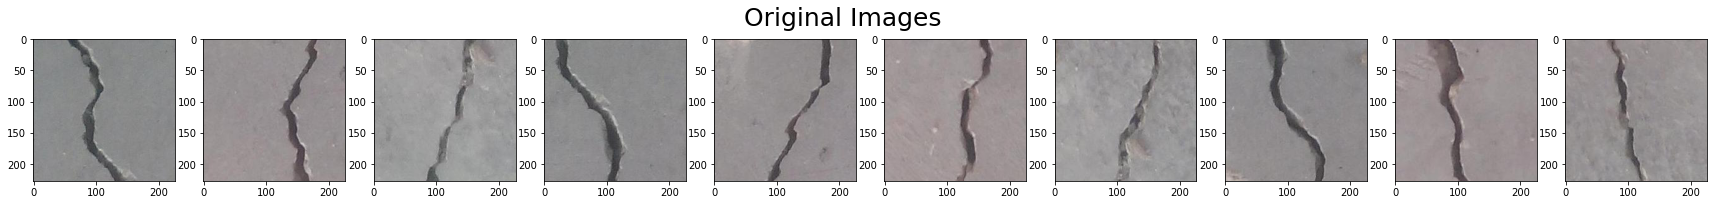

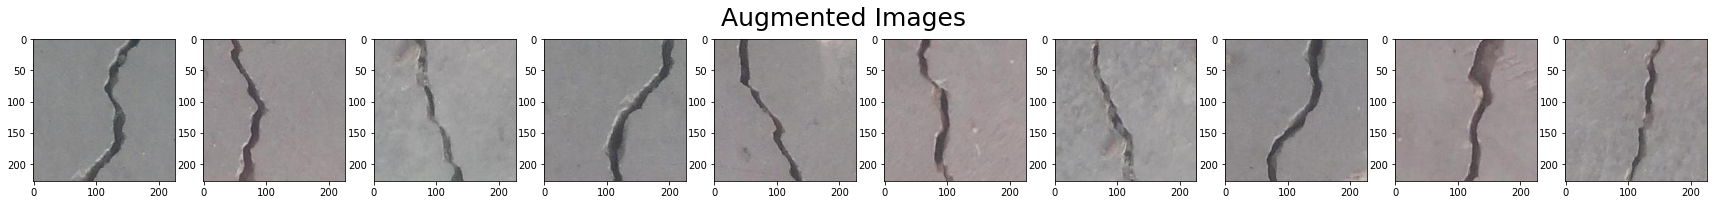

In [ ]:
training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images', fontsize=25) 
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images', fontsize=25) 
plt.show()

**Re-run CNN 3 model using augmented images (horizontal flip) and test its performance**

In [ ]:
cnn3_augmented_fit_history = cnn3.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(cnn3)

Epoch 1/5
640/640 [==============================] - 149s 233ms/step - loss: 0.1360 - accuracy: 0.9918 - val_loss: 0.1933 - val_accuracy: 0.9896
Epoch 2/5
640/640 [==============================] - 148s 231ms/step - loss: 0.0385 - accuracy: 0.9958 - val_loss: 0.0492 - val_accuracy: 0.9935
Epoch 3/5
640/640 [==============================] - 147s 230ms/step - loss: 0.0170 - accuracy: 0.9974 - val_loss: 0.0550 - val_accuracy: 0.9923
Epoch 4/5
640/640 [==============================] - 147s 230ms/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.0504 - val_accuracy: 0.9921
Epoch 5/5
640/640 [==============================] - 147s 230ms/step - loss: 0.1286 - accuracy: 0.9800 - val_loss: 0.0996 - val_accuracy: 0.9641
['negative', 'positive']
Decks:
 [[11015   580]
 [ 1771   254]] 
               precision    recall  f1-score   support

    negative     0.8615    0.9500    0.9036     11595
    positive     0.3046    0.1254    0.1777      2025

    accuracy                         0.8274  

**Re-run ResNet50 model using augmented images (horizontal flip) and test its performance**

In [ ]:
resnet_augmented_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(resnet)

Epoch 1/5
640/640 [==============================] - 167s 261ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 2/5
640/640 [==============================] - 167s 260ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9991
Epoch 3/5
640/640 [==============================] - 166s 260ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 4/5
640/640 [==============================] - 167s 260ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 5/5
640/640 [==============================] - 167s 261ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0241 - val_accuracy: 0.9954
['negative', 'positive']
Decks:
 [[10819   776]
 [ 1190   835]] 
               precision    recall  f1-score   support

    negative     0.9009    0.9331    0.9167     11595
    positive     0.5183    0.4123    0.4593      2025

    accuracy                         0.8557  

## Vertical flip augmentation ##

**Adding vertical flip augmented images to the training set**

In [ ]:
add_augmented_images(3) # vertical flip

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)

Training set:
Found 63996 images belonging to 2 classes.


**Visualizing the augmented images**

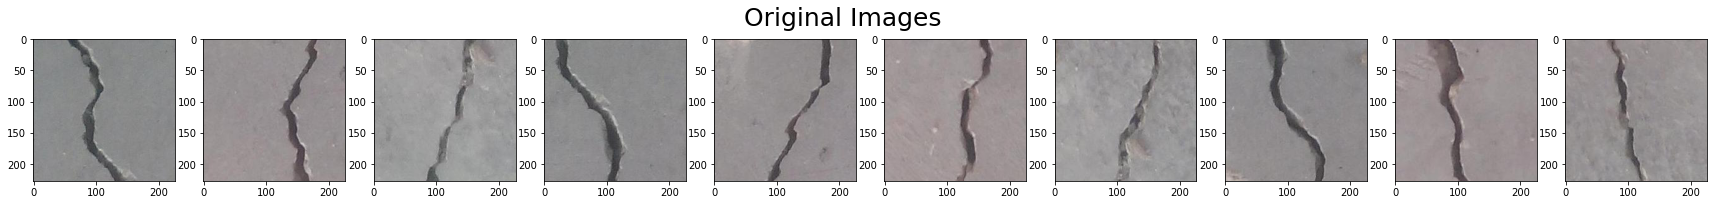

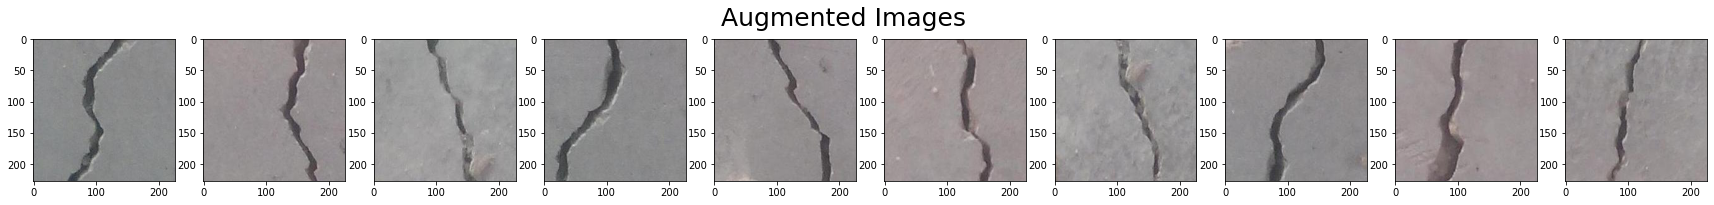

In [ ]:
training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images', fontsize=25)  
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images', fontsize=25) 
plt.show()



```
# This is formatted as code
```

**Re-run CNN 3 model using augmented images (vertical flip) and test its performance**

In [ ]:
cnn3_augmented_fit_history = cnn3.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(cnn3)

Epoch 1/5
640/640 [==============================] - 150s 234ms/step - loss: 0.0645 - accuracy: 0.9785 - val_loss: 0.0609 - val_accuracy: 0.9873
Epoch 2/5
640/640 [==============================] - 149s 233ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 3/5
640/640 [==============================] - 149s 232ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0449 - val_accuracy: 0.9845
Epoch 4/5
640/640 [==============================] - 149s 233ms/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 0.0413 - val_accuracy: 0.9906
Epoch 5/5
640/640 [==============================] - 149s 233ms/step - loss: 0.1092 - accuracy: 0.9816 - val_loss: 0.5499 - val_accuracy: 0.9205
['negative', 'positive']
Decks:
 [[11454   141]
 [ 1977    48]] 
               precision    recall  f1-score   support

    negative     0.8528    0.9878    0.9154     11595
    positive     0.2540    0.0237    0.0434      2025

    accuracy                         0.8445  

**Re-run ResNet50 model using augmented images (vertical flip) and test its 

*   List item
*   List item

performance**

In [ ]:
resnet_augmented_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(resnet)

Epoch 1/5
640/640 [==============================] - 170s 266ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0058 - val_accuracy: 0.9989
Epoch 2/5
640/640 [==============================] - 169s 265ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 3/5
640/640 [==============================] - 169s 264ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0089 - val_accuracy: 0.9984
Epoch 4/5
640/640 [==============================] - 170s 265ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 5/5
640/640 [==============================] - 170s 265ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0049 - val_accuracy: 0.9993
['negative', 'positive']
Decks:
 [[11101   494]
 [ 1491   534]] 
               precision    recall  f1-score   support

    negative     0.8816    0.9574    0.9179     11595
    positive     0.5195    0.2637    0.3498      2025

    accuracy                         0.8543  

# Determining width of crack for severity assessment #

In [ ]:
import cv2, numpy, skimage, math, scipy.ndimage, statistics
from skimage import data
from skimage.color import rgb2gray
from scipy.ndimage.morphology import distance_transform_edt 

def crack_size_estimation(img):
    figure, position = plt.subplots(nrows=1, ncols=6, figsize=(30, 5)) 

    position[0].imshow(img)
    position[0].set_title("Original image", fontsize=20)
    position[0].axis('off')

    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    position[1].imshow(gray_image, cmap=plt.get_cmap('gray'))
    position[1].set_title("Grayscale image", fontsize=20)
    position[1].axis('off')

    threshold, binary_img = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    position[2].imshow(binary_img, cmap=plt.get_cmap('gray'))
    position[2].set_title("Binarized image", fontsize=20)
    position[2].axis('off')

    multiplier = 1.30 
    sigma_value = 21 
    kernel_size = 2 * math.ceil(2*sigma_value) + 1
    blur_img = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), sigma_value)
    position[3].imshow(blur_img, cmap=plt.get_cmap('gray'))
    position[3].set_title("Blur image", fontsize=20)
    position[3].axis('off')

    diff_img = cv2.subtract(gray_image, blur_img)
    # Calculating Sobel operator combining Gaussian smoothing and differentiation
    sobel_x = cv2.Sobel(diff_img, cv2.CV_64F, 1, 0, ksize = 3)
    sobel_y = cv2.Sobel(diff_img, cv2.CV_64F, 0, 1, ksize = 3)
    hypotenuse = np.hypot(sobel_x, sobel_y)
    angle = np.arctan2(sobel_y, sobel_x)
    # calculate threshold
    threshold = 4 * multiplier * np.mean(hypotenuse)
    hypotenuse[hypotenuse < threshold] = 0

    # Obtain edges of the crack
    hypotenuse = cv2.normalize(hypotenuse, 0, 255, cv2.NORM_MINMAX)
    kernel_size = np.ones((5,5), np.uint8)
    result_img = cv2.morphologyEx(hypotenuse, cv2.MORPH_CLOSE, kernel_size)

    position[4].imshow(result_img, cmap=plt.get_cmap('gray'))
    position[4].set_title("Result image", fontsize=20)
    position[4].axis('off')

    dist = distance_transform_edt(numpy.array(result_img))
    crack_width = 227*numpy.mean(dist)

    position[5].imshow(img)
    position[5].set_title("Crack size: "+format(crack_width,'.1f')+" pixels", fontsize=18)
    position[5].axis('off')

    plt.show()


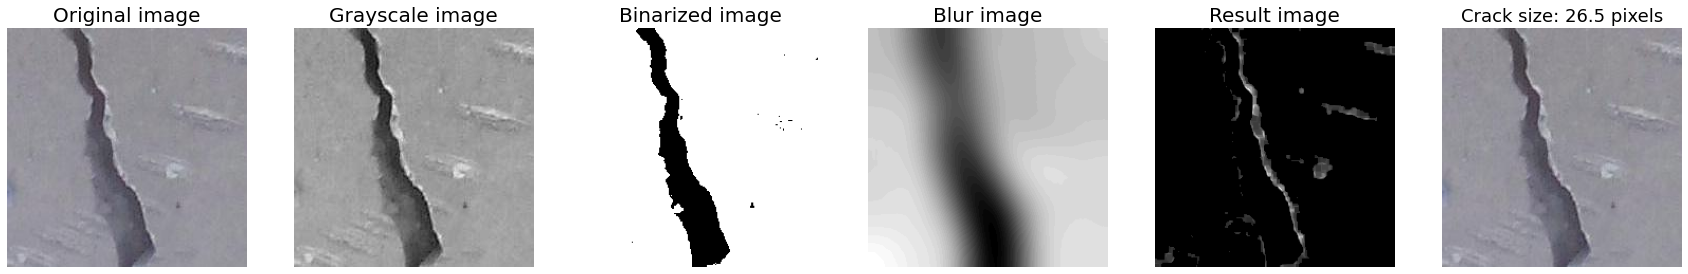

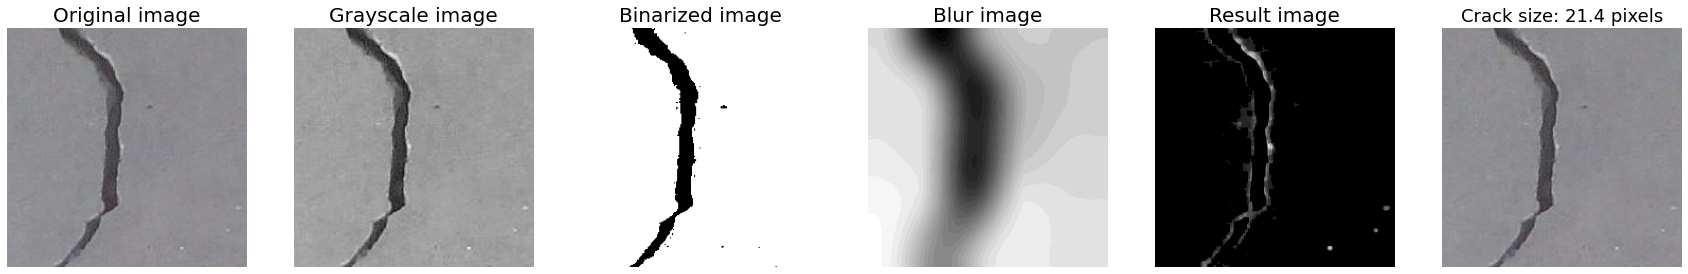

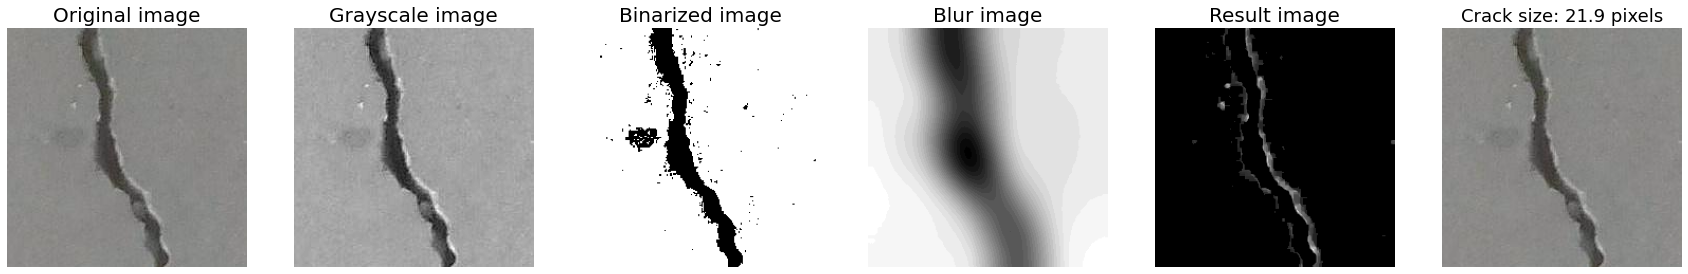

In [ ]:
img = cv2.imread('validation/positive/00011.jpg')
crack_size_estimation(img)

img = cv2.imread('validation/positive/00018.jpg')
crack_size_estimation(img)

img = cv2.imread('validation/positive/00001.jpg')
crack_size_estimation(img)